In [256]:
import numpy as np
import definitionsFits as defs
import matplotlib.pyplot as plt
import cmath
import os
import scipy.special as spcl
import pylab as plb
import twoPhotonDipole as dipole
import defsDipole
import scipy.optimize as sopt

%matplotlib inline


In [257]:
omega = np.arange(0.5, 1.2, 0.005)
m = range(1, 3)
E_0 = -1.1591
E_m = [-0.8502, -0.3278, -0.1665]
alpha = 0.006
T = 3/0.02419

Path = '/Users/cgoldsmith/Desktop/text_files_data'
    # os.chdir(Path)
omega_dip=np.zeros(2000)
i=0
with open(Path+'/omega4dip.txt') as infile:
    for line in infile:
        omega_dip[i]=(line.split()[0])
        i=i+1

dip_1=np.zeros(np.size(omega_dip))
i=0
with open(Path + '/alpha1_3fs.txt') as infile:
    for line in infile:
        dip_1[i]=(line.split()[0])
        i=i+1    

dip_3=np.zeros(np.size(omega_dip))
i=0
with open(Path + '/alpha3_3fs.txt') as infile:
    for line in infile:
        dip_3[i]=(line.split()[0])
        i=i+1       

delta_m = np.zeros(np.size(E_m))
for j in m:
    delta_m[j] = E_m[j] - E_0
    
Path = '/Users/cgoldsmith/Desktop/text_files_data'
os.chdir(Path)
data = np.loadtxt('TDSE_3fs.txt')
x = data[:, 0]
y = data[:, 4]


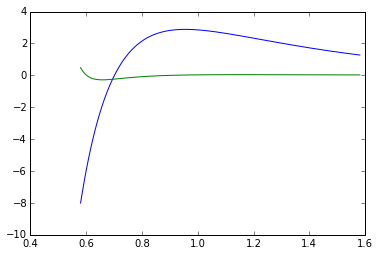

In [4]:
plt.plot(omega_dip, dip_1, omega_dip, dip_3)

In [65]:
oneVsOmega = np.zeros(np.size(omega_dip), 'complex')
threeVsOmega = np.zeros(np.size(omega_dip), 'complex')
i = 0
for i in range(0, np.size(omega_dip)):
    oneVsOmega[i] = dipole.constructDipole(omega_dip[i], defsDipole.wf1)
    threeVsOmega[i] = dipole.constructDipole(omega_dip[i], defsDipole.wf3)

In [74]:
print dipole.constructDipole(omega_dip[100], defsDipole.wf1)
print dipole.constructDipole(omega_dip[100], wf1)

(7.56259799842-8.83143496554e-17j)
(0.149817359481-1.74953404537e-18j)


In [75]:
print dipole.constructBound(wf1)
print dipole.constructBound(defsDipole.wf1)

(0.0250573810079+0j)
(1.26486610172+0j)


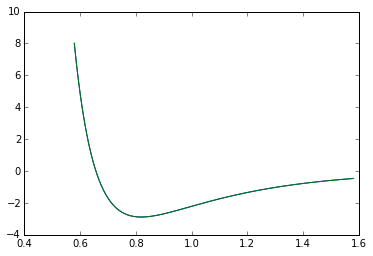

In [238]:
plt.plot(omega_dip, dip_1, omega_dip, np.real(alpha1f))

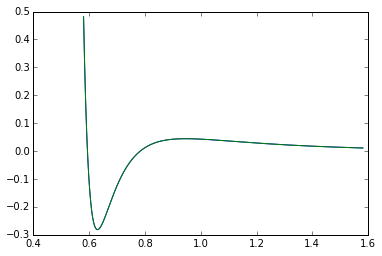

In [237]:
plt.plot(omega_dip, dip_3, omega_dip, np.real(alpha3f))

In [ ]:
defsDipole.getk(1.0, defsDipole.E_0)

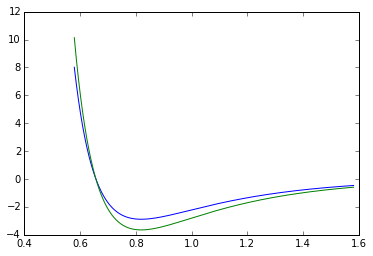

In [224]:
plt.plot(omega_dip, np.real(alpha1f), omega_dip, np.real(oneVsOmega))

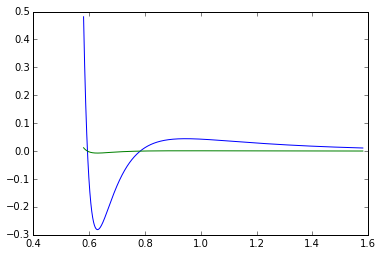

In [228]:
plt.plot(omega_dip, np.real(alpha3f), omega_dip, np.real(threeVsOmega))

In [234]:
E_0 = -1.1591
E_m = [-0.8502, -0.3278, -0.1665]
T = 3/0.02419
delta_m = np.zeros(np.size(E_m))
for j in (0, 1, 2):
    delta_m[j] = E_m[j] - E_0
optSize = np.size(omega_dip)
alpha1f = np.zeros(optSize, 'complex')
alpha3f = np.zeros(optSize, 'complex')
realFactor = np.zeros(optSize, 'complex')
imagFactor = np.zeros(optSize, 'complex')
T = 3 / 0.02419

In [235]:
for i in range(0, np.size(omega_dip)):
    alpha1f[i] = dipole.constructDipole(omega_dip[i], defsDipole.wf1)
    alpha3f[i] = dipole.constructDipole(omega_dip[i], defsDipole.wf3)
# alpha1f = dip_1
# alpha3f = dip_3

In [219]:
# oneVsOmega = np.zeros(np.size(omega_dip), 'complex')
# threeVsOmega = np.zeros(np.size(omega_dip), 'complex')
# i = 0
# for omega in omega_dip:
#     oneVsOmega[i] = dipole.constructDipole(omega, wf1)
#     threeVsOmega[i] = dipole.constructDipole(omega, wf3)
#     i = i + 1

oneVsOmega = np.zeros(np.size(omega_dip), 'complex')
threeVsOmega = np.zeros(np.size(omega_dip), 'complex')
for i in range(0, np.size(omega_dip)):
    oneVsOmega[i] = dip_1[i] * dipole.constructBound(defsDipole.wf1)
    threeVsOmega[i] = dip_3[i] * dipole.constructBound(defsDipole.wf3)
#     oneVsOmega[i] = dipole.constructDipole(omega_dip[i], wf1)
#     threeVsOmega[i] = dipole.constructDipole(omega_dip[i], wf3)
    
    

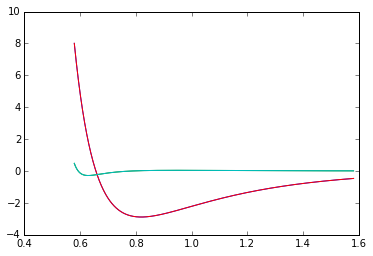

In [229]:
plt.plot(omega_dip, np.real(alpha1f), omega_dip, np.real(alpha3f), omega_dip, dip_1, omega_dip, dip_3)

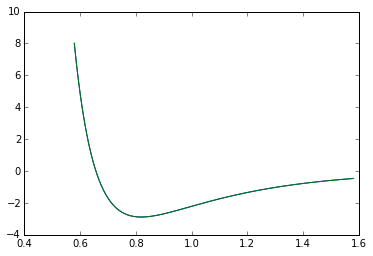

In [232]:
plt.plot(omega_dip, np.real(alpha1f), omega_dip, dip_1)

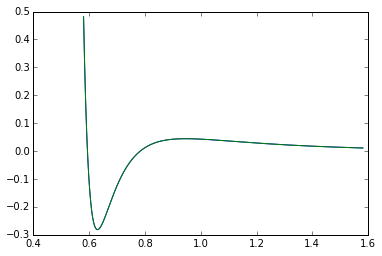

In [231]:
plt.plot(omega_dip, np.real(alpha3f), omega_dip, dip_3)

In [305]:
dawsArg1st = T*(delta_m[0] - omega_dip)
dawsArg3rd = T*(delta_m[1] - omega_dip)
def cheat(omega, free):
    omega = omega_dip
    realFactor = np.real((alpha1f * np.exp(-free*np.power(dawsArg1st,2.0)))\
            + (alpha3f * np.exp(-np.sqrt(free)*np.power(dawsArg3rd, 2.0))))
    imagFactor = (alpha1f * ((-2 * cmath.sqrt(-1))\
            / (np.sqrt(np.pi))) * spcl.dawsn(free*dawsArg1st))\
                + (alpha3f * ((-2 * cmath.sqrt(-1))\
                    / (np.sqrt(np.pi))) * spcl.dawsn(np.sqrt(free)*dawsArg3rd))
    dE = np.gradient(omega)
    dIm = np.gradient(imagFactor, dE)
    dRe = np.gradient(realFactor, dE)
    derivFactor = (realFactor * dIm) - (np.imag(imagFactor * dRe))
    zSquared = realFactor*realFactor + np.imag(imagFactor)*np.imag(imagFactor)
    ans =  (realFactor * np.imag(dIm) - np.imag(imagFactor * dRe)) / zSquared
    return ans

In [307]:
cheat(omega_dip, 0.003)

array([  5.68739772e-05,   5.68711055e-05,   5.68644338e-05, ...,
         3.24228993e-48,   2.80350168e-48,   2.60612180e-48])

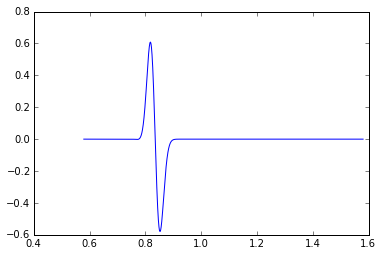

In [308]:
plt.plot(omega_dip, np.real(cheat(omega_dip,0.01)))

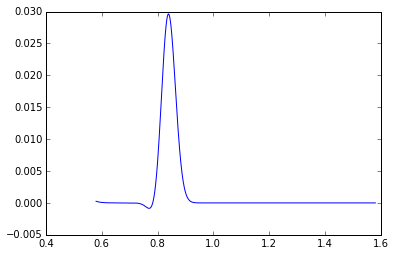

In [279]:
plt.plot(omega_dip, np.real(realFactor))

In [280]:
imagFactor = (alpha1f * ((-2 * cmath.sqrt(-1))\
            / (np.sqrt(np.pi))) * spcl.dawsn(free*dawsArg1st))\
                + (alpha3f * ((-2 * cmath.sqrt(-1))\
                    / (np.sqrt(np.pi))) * spcl.dawsn(np.sqrt(free)*dawsArg3rd))


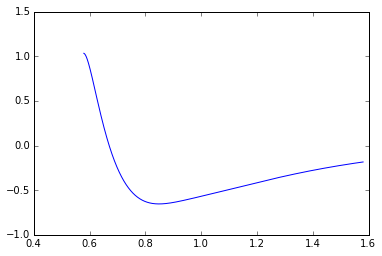

In [281]:
plt.plot(omega_dip, np.imag(imagFactor))

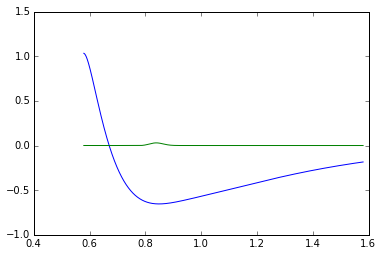

In [282]:
plt.plot(omega_dip, np.imag(imagFactor), omega_dip, realFactor)#, omega_dip, ratio)


In [283]:
dE = np.gradient(omega_dip)
dIm = np.gradient(imagFactor, dE)
dRe = np.gradient(realFactor, dE)

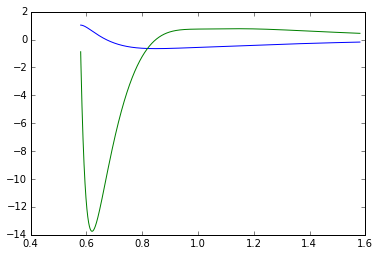

In [284]:
plt.plot(omega_dip, np.imag(imagFactor), omega_dip, np.imag(dIm))

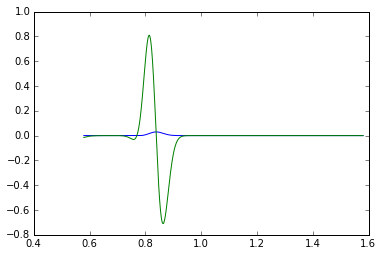

In [285]:
plt.plot(omega_dip, realFactor, omega_dip, dRe)

In [286]:
derivFactor = (realFactor * dIm) - (np.imag(imagFactor * dRe))

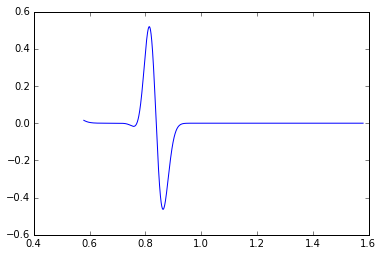

In [287]:
plt.plot(omega_dip, derivFactor)

In [288]:
zSquared = realFactor*realFactor + np.imag(imagFactor)*np.imag(imagFactor)

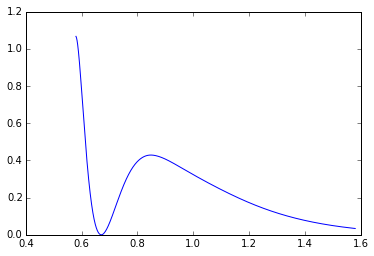

In [289]:
plt.plot(omega_dip, zSquared)

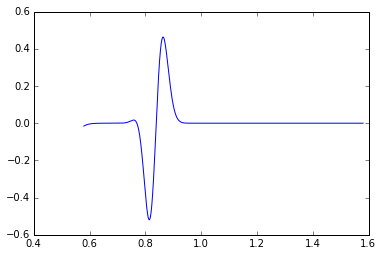

In [290]:
plt.plot(omega_dip, np.imag(imagFactor*dRe))

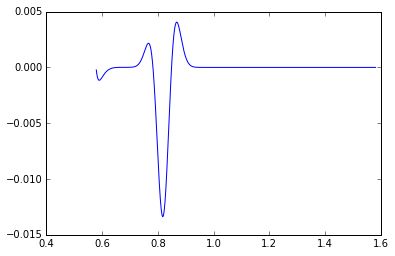

In [291]:
plt.plot(omega_dip, np.imag(realFactor*dIm))

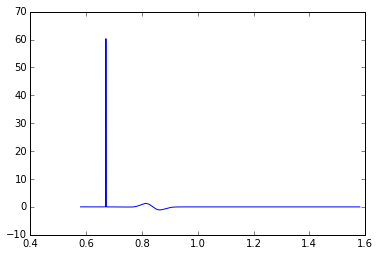

In [292]:
plt.plot(omega_dip, (realFactor*np.imag(dIm) - np.imag(imagFactor*dRe))/zSquared)
# plb.xlim([0.8, 1.0])


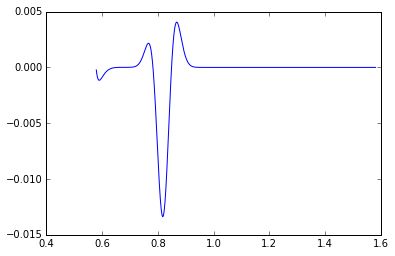

In [293]:
plt.plot(omega_dip, realFactor*np.imag(dIm))

(-10, 10)

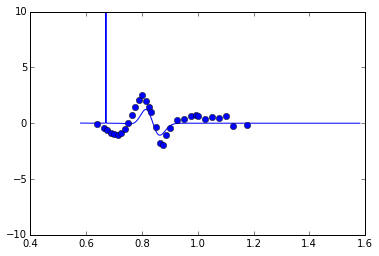

In [294]:
plt.plot(omega_dip, (realFactor*np.imag(dIm) - np.imag(imagFactor*dRe))/zSquared, x, y, 'bo')
plb.ylim([-10, 10])

In [309]:
Path = '/Users/cgoldsmith/Desktop/text_files_data'
os.chdir(Path)
data = np.loadtxt('TDSE_3fs.txt')
x = data[:, 0]
y = data[:, 4]
sopt.curve_fit(cheat, x, y,\
 bounds=(-1, 1), max_nfev=10000, check_finite=False)

ValueError: operands could not be broadcast together with shapes (2000,) (32,) 

/Users/cgoldsmith/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide
/Users/cgoldsmith/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: overflow encountered in divide


(-10, 10)

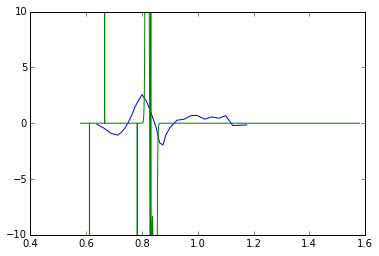

In [19]:
test1 = fitDipoleFactors(omega_dip, 700)


(-10, 10)

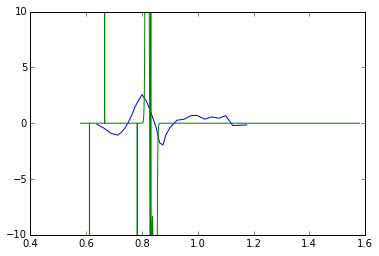

In [20]:
plt.plot(x, y, omega_dip, test1)
plb.ylim([-10, 10])